In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import librosa    
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import tensorflow.keras as keras
# encabezado
# tercer encabezado
# new branch
# segundo encabezado
%matplotlib inline

In [5]:
audio_data = []
labels = []
sampling_rate = []
file_names = []


In [7]:
data, samplerate = librosa.load("dataset/001 - Dog bark/1-30344-A.ogg", sr=44000) 
print(data.shape)
print(samplerate)


(220044,)
44000


In [8]:
time_sec = (len(data)/samplerate)
step = time_sec/len(data)
print(time_sec)
print(step)
i=0
time_divion=[]
while i<=time_sec-step:
    
    time_divion.append(i)
    i=i+step
# the fourth second step
four_sec_step_number = (4*len(time_divion))/time_sec
print(four_sec_step_number)

5.001
2.272727272727273e-05
176000.0


In [9]:
classes = []
label_number=0
audio_data = []
labels = []
sampling_rate = []
file_names = []
data = []
noisy_removed=[]
noise=[]
for filepath in glob.iglob('dataset/*'):
    
    #print(filepath[9:])
    
    #print(filepath)
    classes.append(filepath[8:])

print(classes)

for i in classes:
    print("the class = "+i+", the label = "+str(label_number))
    for j in glob.iglob('dataset/'+i+'/*'):
        #samplerate, data = wavfile.read(j)
        y, s = librosa.load(j, sr=44000) # Downsample 44.1kHz to 8kHz
        #reduced_noise = nr.reduce_noise(audio_clip=y, noise_clip=y, verbose=False)
        #print(s)
        #print(j)
        data.append([y,label_number])
        #noise.append(y)
        #labels.append(label_number)
        
    label_number = label_number + 1
print(len(labels))
#print(labels)


['001 - Dog bark', '002 - Rain', '003 - Sea waves', '004 - Baby cry', '005 - Clock tick', '006 - Person sneeze', '007 - Helicopter', '008 - Chainsaw', '009 - Rooster', '010 - Fire crackling', 'ESC-10-HumanClassification.xlsx', 'ESC-10.png', 'README.md', 'README.txt']
the class = 001 - Dog bark, the label = 0
the class = 002 - Rain, the label = 1
the class = 003 - Sea waves, the label = 2
the class = 004 - Baby cry, the label = 3
the class = 005 - Clock tick, the label = 4
the class = 006 - Person sneeze, the label = 5
the class = 007 - Helicopter, the label = 6
the class = 008 - Chainsaw, the label = 7
the class = 009 - Rooster, the label = 8
the class = 010 - Fire crackling, the label = 9
the class = ESC-10-HumanClassification.xlsx, the label = 10
the class = ESC-10.png, the label = 11
the class = README.md, the label = 12
the class = README.txt, the label = 13
0


In [10]:
import random

random.shuffle(data)

for i,j in data:
    audio_data.append(i)
    labels.append(j)
    


In [12]:
print(labels[0])

0


In [14]:
example = random.randint(0,400)


Text(0.5, 1.0, 'signal in real time')

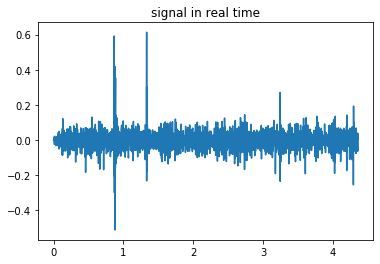

In [15]:
save_path='Helicopter_before.jpg'
plt.plot(time_divion[0:192000],audio_data[example][0:192000])
#plt.show()
plt.title('signal in real time')
#pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#pylab.close()


In [16]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data[example])), ref=np.max)
mfcc = librosa.feature.mfcc(y=audio_data[example])
print(freq.shape)
print(labels[example])

(1025, 430)
9


In [17]:
example

204

Text(0.5, 1.0, 'short time fourier transform')

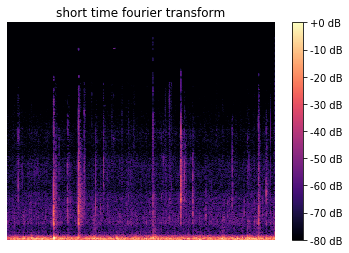

In [18]:
save_path = 'Helicopter.jpg'

plt.axis('off') # no axis
librosa.display.specshow(freq)
plt.colorbar(format='%+2.0f dB')
plt.title('short time fourier transform')
#pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#pylab.close()


In [41]:
stft = []
for i in range (0,400):
    if i%100 == 0:
        print(i)
    freq = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data[i])), ref=np.max)

    #freq = np.abs(librosa.stft(audio_data[i], n_fft=512, hop_length=256, win_length=512))

    freq=freq.reshape(-1,1)
    print(freq.shape)
  

    stft.append(freq[:437675])
    if freq.shape[0]<437675:
        print(freq.shape)
    
stft =np.array(stft) 
stft.shape
    

0
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(437675, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(439725, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(617050, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(439725, 1)
(440750, 1)
(440750, 1)
(440750, 1)
(4

(400,)

In [38]:
stft[0][0].shape

(437675, 1)

In [40]:
stft=stft.reshape(400,437675)
stft.shape

ValueError: cannot reshape array of size 400 into shape (400,437675)

In [37]:
stft[399][0].shape


(437675, 1)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(stft,y = )

normalized_stft = scaler.transform(stft)

print(np.amax(stft))
print(np.amax(normalized_stft))

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [15]:
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(stft, labels, test_size=0.20, random_state=1150)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.0625


In [32]:
features_convolution = np.reshape(normalized_stft,(400,1025, -1,1))

In [36]:
y=keras.utils.to_categorical(labels, num_classes=10, dtype='float32')


In [34]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=features_convolution.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''
#model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.2))

#'''
#'''
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#'''


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model.add(Dense(1000))#input_shape=features.shape[1:]
model.add(Dense(64))#input_shape=features.shape[1:]

model.add(Dense(10))
model.add(Activation('softmax'))
sgd = optimizers.SGD(lr=0.0000001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(features_convolution, y,batch_size=8, epochs=40,validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/40
320/320 [==============================] - 201s 629ms/step - loss: 2.3042 - acc: 0.0594 - val_loss: 2.3040 - val_acc: 0.0750
Epoch 2/40
320/320 [==============================] - 182s 569ms/step - loss: 2.3035 - acc: 0.0750 - val_loss: 2.3062 - val_acc: 0.0875
Epoch 3/40
320/320 [==============================] - 198s 618ms/step - loss: 2.3031 - acc: 0.0969 - val_loss: 2.3076 - val_acc: 0.0750
Epoch 4/40
320/320 [==============================] - 196s 613ms/step - loss: 2.3029 - acc: 0.1063 - val_loss: 2.3092 - val_acc: 0.0750
Epoch 5/40
320/320 [==============================] - 196s 611ms/step - loss: 2.3025 - acc: 0.1063 - val_loss: 2.3108 - val_acc: 0.0750
Epoch 6/40
120/320 [==========>...................] - ETA: 1:52 - loss: 2.2998 - acc: 0.1333

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()